# Домашняя работа №3 (Курс "Advanced Python", 2 семестр)
## ФИО: Волков Сергей Андреевич

**Тема:** Машинное обучение  
**Выдана:** 16 апреля  
**Мягкий дедлайн:** 23 апреля  
**Жесткий дедлайн:** 30 апреля

#### Данное задание идет с весом 1.5! Т.е за эту работу можно получить максимум 10 * 1.5 = 15 баллов!

**Правила:**
Результат выполнения задания - отчет в формате Jupyter Notebook с кодом и выводами. В ходе выполнения задания требуется реализовать все необходимые алгоритмы, провести эксперименты и ответить на поставленные вопросы. Дополнительные выводы приветствуются. Чем меньше кода и больше комментариев - тем лучше.

Все ячейки должны быть "выполненными", при этом результат должен воспроизвдиться при проверке.

Задание выполняется самостоятельно. **Если вы нашли в Интернете какой-то код, который собираетесь заимствовать, обязательно укажите это в задании.** Если вы советовались с товарищем и/или позаимствовали его решение, обязательно укажите об этом в отчете. Нет ничего плохого в том, что вы пытаетесь разобраться и помогаете друг другу; плохо - когда вы скрываете это и выдаете чужие заслуги за свои. При обнаружении списывания ВСЕМ студентам, имеющим одинаковые списанные решения будет выставлен ОТРИЦАТЕЛЬНЫЙ балл (т.е если задача стоит 4 балла, вы получите не 0, а -4), "оригинал" искаться не будет

Задание, сданное после жесткого дедлайна, не принимается.

Автор задания: Павел Плюснин

# MNIST (10 баллов)
Давайте посмотрим на еще один классический датасет. В нем необходимо классифицировать цифры на изображении

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
# эта команда может выполняться несколько минут
mnist = fetch_openml('mnist_784', version=1)

In [3]:
mnist.data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
print(mnist.DESCR)

The MNIST database of handwritten digits with 784 features. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image by computing the center of mass of the pixels, and translating the image so as to position this point at the center of the 28x28 field.  

With some classification methods (particularly template-based methods, such as SVM and

In [5]:
print("Размерность данных" , mnist.data.shape)

Размерность данных (70000, 784)


Каждое изображение представляет собой матрицу 28*28 (вектор из 784 значений)

In [6]:
mnist.data.shape

(70000, 784)

In [7]:
print(mnist.data.to_numpy()[0].reshape((28,28)))  # вектор представил в виде матрицы 28*28

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
   18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
  253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.  

In [8]:
# Изображенные цифры (метки классов) содержатся в 
mnist.target

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

**Пункт 0 (0.2 балла)**: разделите данные на обучающую и тестовую выборку. На тест оставьте 10% данных

In [9]:
type(mnist.data), type(mnist.target)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [10]:
from sklearn.model_selection import train_test_split  # имя требуемой функции здесь

X_train, X_test, y_train, y_test = train_test_split(
    mnist.data.to_numpy(), mnist.target.to_numpy().astype(int), test_size=0.1,  random_state=123
)  # деление выборки

In [11]:
X_test.shape

(7000, 784)

In [12]:
y_test

array([0, 9, 4, ..., 8, 2, 4])

In [13]:
import matplotlib.pyplot as plt
import numpy as np

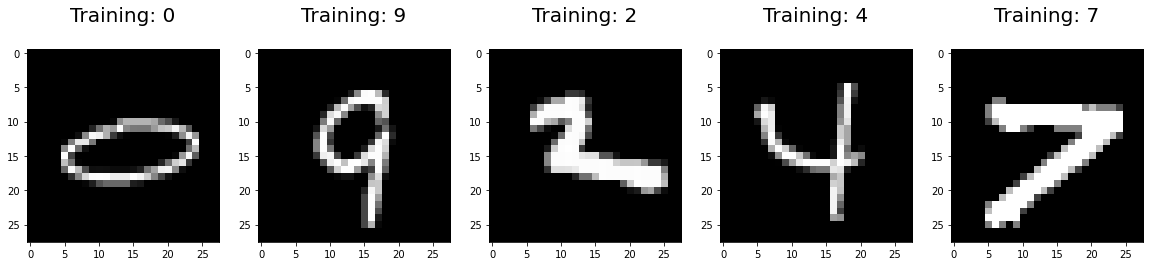

In [14]:
# Посмотрим, как выглядят наши цифры
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(X_train[0:5], y_train[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(image.reshape(28, 28), cmap=plt.cm.gray)
    plt.title('Training: %s\n' % label, fontsize=20)

# Модели без предобработки

**Пункт 1.1 (1 балл):** Постройте 3 линейные модели на изображениях как есть (используйте все 784 признака без предобработки). Постройте Логистическую регрессию, а также линейную модель с L2(ridge) и L1(lasso) регуляризаторами. Как долго учились модели? 

**За каждое отсутствие ответа на текстовые вопросы (в том числе за пункты, без проставления баллов) - минус пол балла**

In [15]:
%%time
from sklearn.linear_model import RidgeClassifier, Lasso, LogisticRegression  # укажите имена требуемых моделей
from time import time

#ваш код здесь

Wall time: 75.2 ms


In [16]:
def train_linear_models(X_train, y_train, X_test, y_test):
    for classifier, name in zip(
        [LogisticRegression, RidgeClassifier, Lasso],
        ['Logistic', 'Ridge', 'Lasso']
    ):
        model = classifier()
        start = time()
        model.fit(X_train, y_train)
        print(f'{name} Classification Learning time = {time() - start} seconds')
        print(f'{name} Classification Accuracy = {model.score(X_test, y_test)}', end='\n\n')

In [92]:
train_linear_models(X_train, y_train, X_test, y_test)

c:\users\volko\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Classification Learning time = 29.937246322631836 seconds
Logistic Classification Accuracy = 0.921

Ridge Classification Learning time = 1.200620174407959 seconds
Ridge Classification Accuracy = 0.8455714285714285

Lasso Classification Learning time = 8.644776582717896 seconds
Lasso Classification Accuracy = 0.5954828597753059



**Логистическая модель учится дольше всего, поскольку там присутствуют сложные вычисления экспоненты и т.п. Я не нашел Лассо Классификатора, поэтому скор у регрессора, наученного на данных для классификации не очень высокий (хотя Модель Логистического Регрессора выдает вполне нормальный скор, не знаю, в чем проблема).**

**Пункт 1.2 (3 балла):** Постройте kNN классификатор, случайный лес, а также бустинг над деревьями. Подберите оптимальные гиперпараметры для каждой модели (вам может помочь поиск по сетке)

In [20]:
#ваш код здесь
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix

import seaborn as sns

In [18]:
def choose_classifier_params(classifier, params, X_train, y_train, X_test, y_test):
    clf = classifier()
    grid_search = RandomizedSearchCV(
        clf,
        params,
        n_jobs=2,
        cv=3,
        verbose=10
    )
    grid_search.fit(X_train, y_train)
    best_clf = grid_search.best_estimator_
    print(f'Best parameters are {grid_search.best_params_}')
    print(f'{name} Classifier Accuracy = {best_clf.score(X_test, y_test)}', end='\n\n')

    conf_matrix = confusion_matrix(y_test, best_clf.predict(X_test))

    plt.figure(figsize=(9,9))
    sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
    plt.ylabel('Actual label'); plt.xlabel('Predicted label'); plt.title(f'{name} Classifier')

    return best_clf

In [19]:
best_classifiers = {}

kNN
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters are {'weights': 'distance', 'n_neighbors': 30, 'leaf_size': 30}
kNN Classifier Accuracy = 0.9582857142857143

RandomForest
Fitting 3 folds for each of 9 candidates, totalling 27 fits


c:\users\volko\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Best parameters are {'n_estimators': 300, 'max_depth': 13}
RandomForest Classifier Accuracy = 0.964



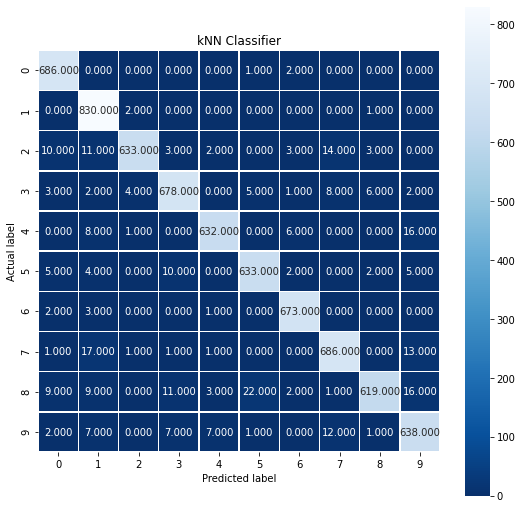

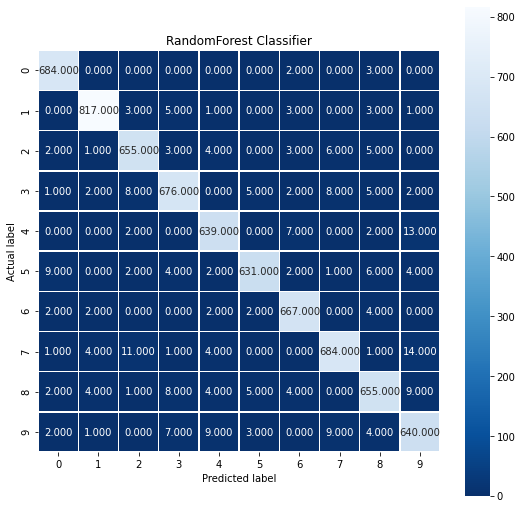

In [20]:
for (classifier, name), params in zip(
        [
            (KNeighborsClassifier, 'kNN'), 
            (RandomForestClassifier, 'RandomForest'), 
#             (GradientBoostingClassifier, 'BoostedTrees')
        ],
        [
            {  # kNN
                'n_neighbors': range(30, 51, 10), 
                'weights': ['distance'],
                'leaf_size': range(10, 31, 5)
            },
            {  # RandomForest
                'n_estimators': range(100, 301, 100), 
                'max_depth': range(3, 16, 5)
            },
#             {  # BoostedTrees
#                 'n_estimators': range(100, 301, 100), 
#                 'max_depth': range(3, 16, 5)  # бустинг из sklearn учится нереально долго,
#             }  # поэтому параметры нормально подобрать просто невозможно, I give up
        ]
    ):
    print(name)
    best_classifiers[name] = choose_classifier_params(classifier, params, X_train, y_train, X_test, y_test)

**Обучение идет нормально, просто почему-то с таким `verbose` промежуточные результаты идут в консоль терминала.**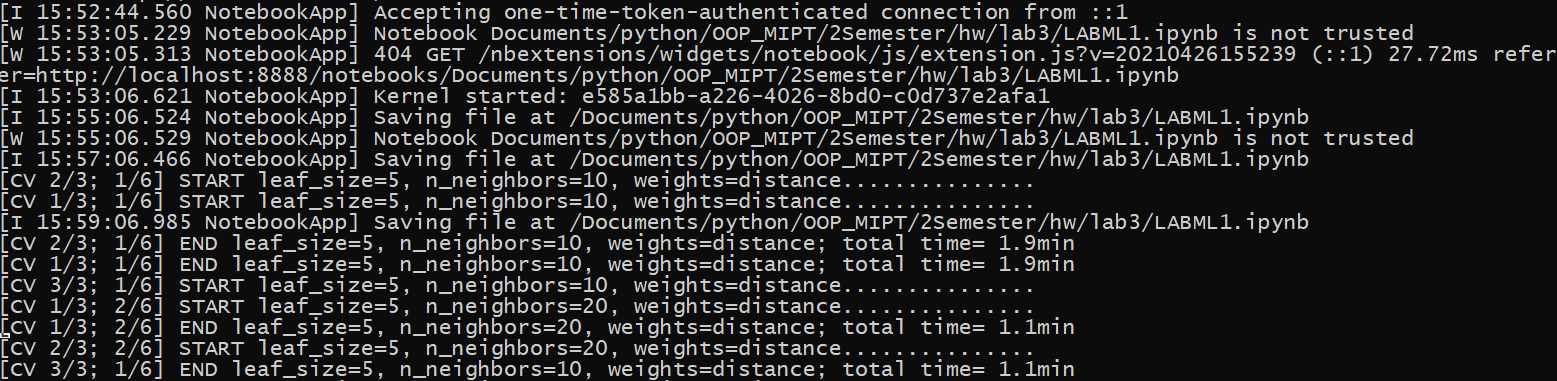

In [27]:
# короче я забил подбирать параметры для бустинга,
# это нереально долго, даже со стандартными, он учится час (!!!)
Boosted_Trees = GradientBoostingClassifier(learning_rate=1, verbose=10)
best_classifiers['BoostedTrees'] = Boosted_Trees.fit(X_train, y_train)
print(f'BoostedTrees Classifier Accuracy = {Boosted_Trees.score(X_test, y_test)}', end='\n\n')

      Iter       Train Loss   Remaining Time 
         1           1.1826           62.10m


KeyboardInterrupt: 

In [48]:
# и перешел на XGBoost...
start = time()
Boosted_Trees = XGBClassifier(objective='multi:softprob', n_jobs=2)
best_classifiers['BoostedTrees'] = Boosted_Trees.fit(
    X_train, y_train, 
    eval_set=[(X_test, y_test)],
    eval_metric='merror',
    verbose=True,
    early_stopping_rounds=True
)
print(f'XGBoostClassifier learning time = {time() - start} seconds')

c:\users\volko\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-merror:0.15114
[1]	validation_0-merror:0.11171
[2]	validation_0-merror:0.09714
[3]	validation_0-merror:0.08786
[4]	validation_0-merror:0.08157
[5]	validation_0-merror:0.07586
[6]	validation_0-merror:0.07257
[7]	validation_0-merror:0.06771
[8]	validation_0-merror:0.06414
[9]	validation_0-merror:0.06129
[10]	validation_0-merror:0.05900
[11]	validation_0-merror:0.05500
[12]	validation_0-merror:0.05214
[13]	validation_0-merror:0.04971
[14]	validation_0-merror:0.04900
[15]	validation_0-merror:0.04671
[16]	validation_0-merror:0.04500
[17]	validation_0-merror:0.04314
[18]	validation_0-merror:0.04171
[19]	validation_0-merror:0.04057
[20]	validation_0-merror:0.03914
[21]	validation_0-merror:0.03843
[22]	validation_0-merror:0.03800
[23]	validation_0-merror:0.03700
[24]	validation_0-merror:0.03671
[25]	validation_0-merror:0.03557
[26]	validation_0-merror:0.03500
[27]	validation_0-merror:0.03386
[28]	validation_0-merror:0.03300
[29]	validation_0-merror:0.03229
[30]	validation_0-me

In [36]:
from sklearn.metrics import accuracy_score

In [50]:
print(f'''BoostedTrees Classifier Accuracy = {
accuracy_score(best_classifiers['BoostedTrees'].predict(X_test), y_test)}''', end='\n\n')

conf_matrix = confusion_matrix(y_test, best_classifiers['BoostedTrees'].predict(X_test))

plt.figure(figsize=(9,9))
sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label'); plt.xlabel('Predicted label'); plt.title('BoostedTrees Classifier')

BoostedTrees Classifier Accuracy = 0.9697142857142858



**В общем не надо использовать бустинг в sklearn... Даже параметры не буду в XGBoost подбирать, я устал я мухожук.**

**Пункт 2.1:** Как вы думаете, можно ли для данной задачи в качестве метрики качества использовать Accuracy? Обоснуйте свой ответ

#ваше обоснование

**Можно, но не стоит, поскольку тут 10 классов, из которых какие-то между собой похожи, а какие-то очень разные. Например, цифры 1 и 7 не так сильно отличаются друг от друга, как 1 и 8, но Accuracy в случае ошибки классификатора 1 -> 8 и 1 -> 7 не будет сильно отличаться (а стояло бы).**

**Пункт 2.2:** в любом случае, посмотрите на Accuracy для ваших моделей. Какая из них отработала лучше всего? Как вы думаете, почему?

In [ ]:
#ваш код и комментарии здесь
# см. код пункта 1.2

**Метод k ближайщих соседей отработал немного лучше, чем Случайный Лес, и намного лучше, чем Бустинг над деревьями, но у последнего не получилось подобрать оптимальные параметры из-за долгого времени обучения. Скорее всего хорошая точность kNN связана с тем, что цифры в целом довольно сильно отличаются друг от друга и их можно разделить в пространстве признаков. Поэтому и метрический алгоритм отработал хорошо.** 

**Пункт 2.3 (0.2 балла)**: получите confusion матицы ваших классификаторов

In [ ]:
# ваша матрица, используя функцию из metrics
# см. код пункта 1.2

In [ ]:
# построим красивую визуализацию
# см. код пункта 1.2

# Понижаем размерность

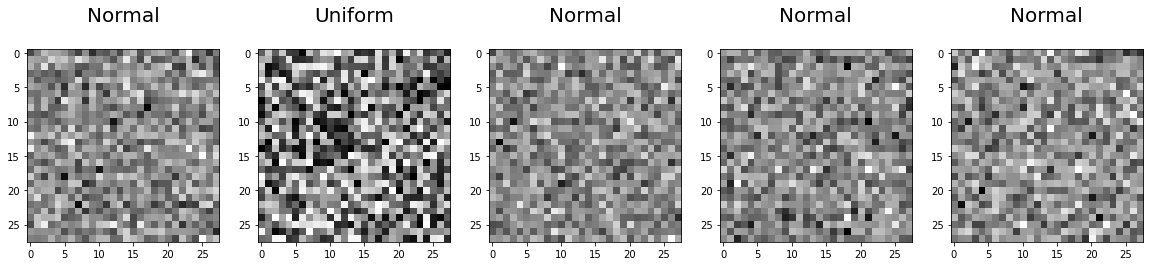

In [51]:
plt.figure(figsize=(20,4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    #сгенерируем из равномерного или нормального распределений
    is_normal = np.random.randint(0,2)
    if is_normal:
        image = np.random.randn(784)
    else:
        image = np.random.randint(0, 255, 784)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    
    label = "Normal" if is_normal else "Uniform"
    plt.title('%s\n' % label, fontsize = 20)

Заметим, что наши изображения далеки от случайного шума, т.е наши данные явно имеют размерность ниже, чем 784

**Пункт 3.1:** используя t-SNE, постройте визуализацию объектов на плоскости (чтобы все отрисовалось быстрее, стройте не на всей выборке, а только на 2000 элементах). Насколько хорошо выделились классы?

### В пунктах 3 и 4 работаем только с подвыборкой размера 2000!

In [25]:
from sklearn.manifold import TSNE  # ваш код здесь
start = time()
tsne_representation = TSNE().fit_transform(X_train[:2000])  # и тут
print(f't-SNE Learning time = {time() - start} seconds')

t-SNE Learning time = 7.423304796218872 seconds


In [26]:
import pandas as pd
# Чтобы визуализация была корректной, вы должны были трансформировать X_train[:2000]
tsne_repr = pd.DataFrame()
tsne_repr['tsne-2d-one'] = tsne_representation[:,0]
tsne_repr['tsne-2d-two'] = tsne_representation[:,1]
tsne_repr["y"] = y_train[:2000]

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

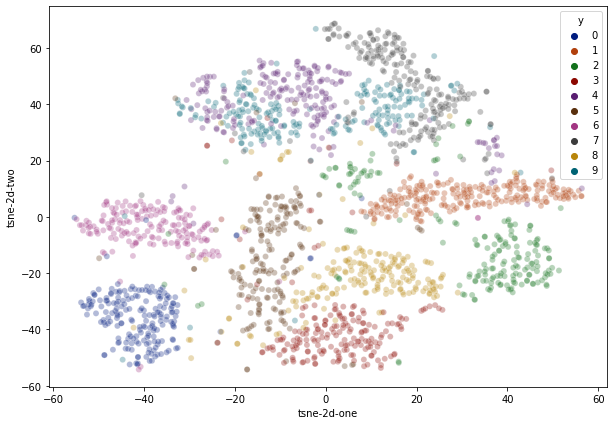

In [27]:
plt.figure(figsize=(10,7))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("dark", 10),
    data=tsne_repr,
    legend="full",
    alpha=0.3
)

**В целом классы по большей части собрались в облачка, но есть такие, которые пересекаются почти всюду с другими, например, 4**

**Пункт 3.2 (за пункты 3.1+3.2 = 0.8 баллов)**: для сравнения постройте на тех же данных такую же визуализацию, используя метод главных компонент. Сравните две визуализации (по скорости построения, а также по качеству кластеризации)

In [28]:
from sklearn.decomposition import PCA  # дополните здесь
start = time()
pca_representation = PCA().fit_transform(X_train[:2000])  # ваш код здесь
print(f'PCA Learning time = {time() - start} seconds')

PCA Learning time = 0.579362154006958 seconds


<AxesSubplot:xlabel='pca-2d-one', ylabel='pca-2d-two'>

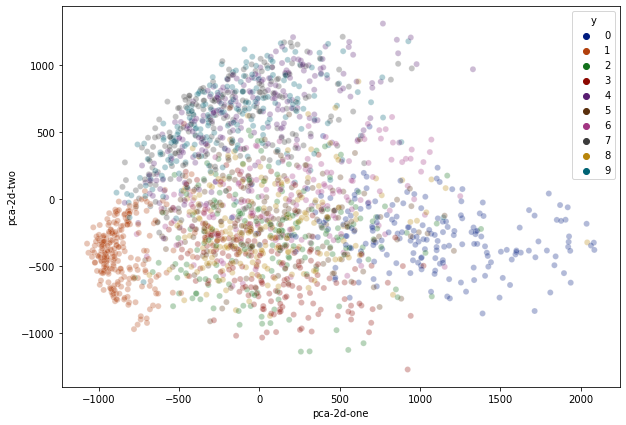

In [29]:
pca_repr = pd.DataFrame()
pca_repr['pca-2d-one'] = pca_representation[:,0]
pca_repr['pca-2d-two'] = pca_representation[:,1]
pca_repr["y"] = y_train[:2000]

plt.figure(figsize=(10,7))
sns.scatterplot(
    x="pca-2d-one", y="pca-2d-two",
    hue="y",
    palette=sns.color_palette("dark", 10),
    data=pca_repr,
    legend="full",
    alpha=0.3
)

** При использовании PCA почти ничего не разделилось, но работал он примерно в 20 раз быстрее.**

# Кластеризация
Давайте временно отвлечемся на данные tsne_repr, полученные применением t-SNE к 2000 объектам train данных

In [57]:
tsne_repr.head()

,tsne-2d-one,tsne-2d-two,y
0,3.421669,-1.733392,0
1,40.096394,-25.963297,9
2,6.487322,-24.724987,2
3,40.543358,-34.865608,4
4,49.597832,19.010675,7


**Пункт 4.1: (1 балл)** Давайте посмотрим на работу алгоритма DBSCAN (не передавайте метку класса y!). Зафиксируем минимальное количество объектов в корневой точке - 55. Подберите радиус окрестности (может быть дробным), чтобы dbscan выделил ровно 10 классов (включая класс выбросов "-1"), но так, чтобы в каждом классе (в шумовом в том числе) было не более 400 объектов. Последнее ограничение введено затем, чтобы большинство объектов не попало в один большой кластер, а остальные кластера оказались незначительно мелкими

In [63]:
from sklearn.cluster import DBSCAN  # ваш код здесь и далее

# for epsilon in np.arange(0.9, 1.7, .01):
dbscan_repr = DBSCAN(min_samples=55, eps=8).fit_predict(tsne_repr.iloc[:, :-1])  # предсказания меток dbscanом
#     print(epsilon, np.vstack(np.unique(dbscan_repr, return_counts=True)), sep='\n', end='\n\n')

In [64]:
np.vstack(np.unique(dbscan_repr, return_counts=True))

array([[ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8],
       [303, 280, 262,  73, 145, 275, 193, 173, 185, 111]], dtype=int64)

**Посмотрите на визуализацию точек выше, насколько адекватно был выбран радиус окрестности?**

**Да, примерно такое расстояние и есть внутри облаков на плоскости (но не везде, где-то точки ближе, либо пересекаются классы).**

Посмотрим, насклько качественно отработал DBSCAN

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

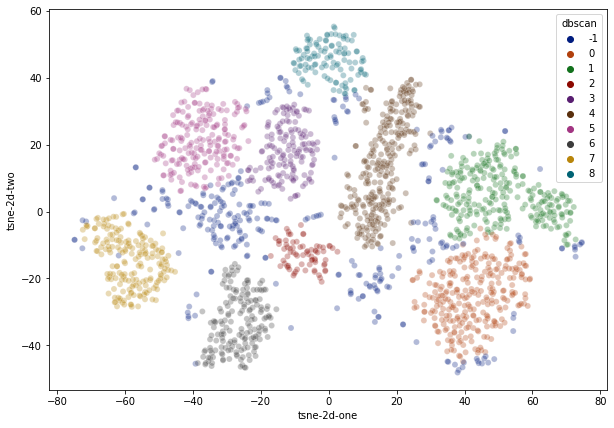

In [65]:
tsne_repr["dbscan"] = dbscan_repr

plt.figure(figsize=(10,7))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="dbscan",
    palette=sns.color_palette("dark", 10),
    data=tsne_repr,
    legend="full",
    alpha=0.3
)

**Пункт 5.1 (1 балл)**. Вернитесь ко всей выборке. Пользуясь критерием крутого спуска найдите характерную размерность данных.   
**Пункт 5.2 (1 балл)** Во время поиска эффективной размерности, ужимайте Train и test выборку до текущей раземрности и стройте понравивщуюся линейную модель на train данных, записывайте метрику качества на тестовых данных. Постройте график зависимости качества от размерности. Верно ли, что с качеством наблюдается такая же тенденция, что и с сохраненной дисперсией? Наблюдается ли крутой спуск/подъем? Если да, то происходит ли он на эффективном значении расзмерноти (где наблюдается крутой спуск потерянной дисперсии)?

In [ ]:
# ваш код, графики и выводы здесь

In [66]:
pca = PCA()
pca.fit(mnist.data)

PCA()

**На графике ниже нельзя отсечь момент резкого изменения суммы сингулярных чисел при изменении размерности. Поэтому я использовал критерий, что она должна быть больше либо равна 95% от изначальной суммарной дисперсии.**

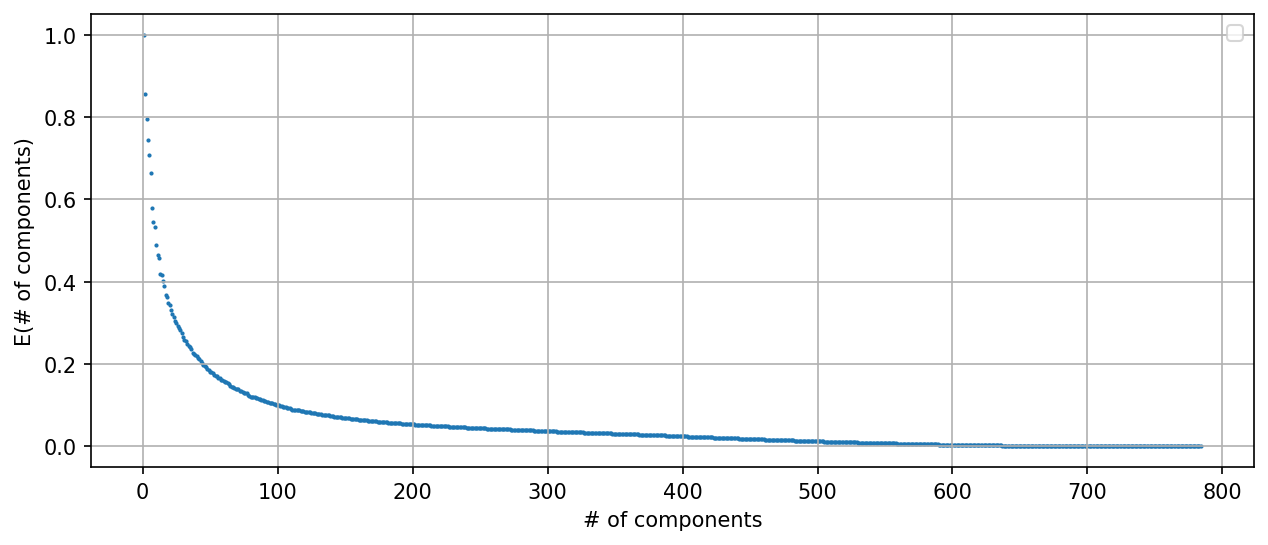

In [80]:
plt.figure(dpi=150, figsize=(10, 4))
plt.scatter(range(1, 785), pca.singular_values_ / pca.singular_values_[0], s=1)
plt.xlabel('# of components')
plt.ylabel('E(# of components)')
plt.grid()

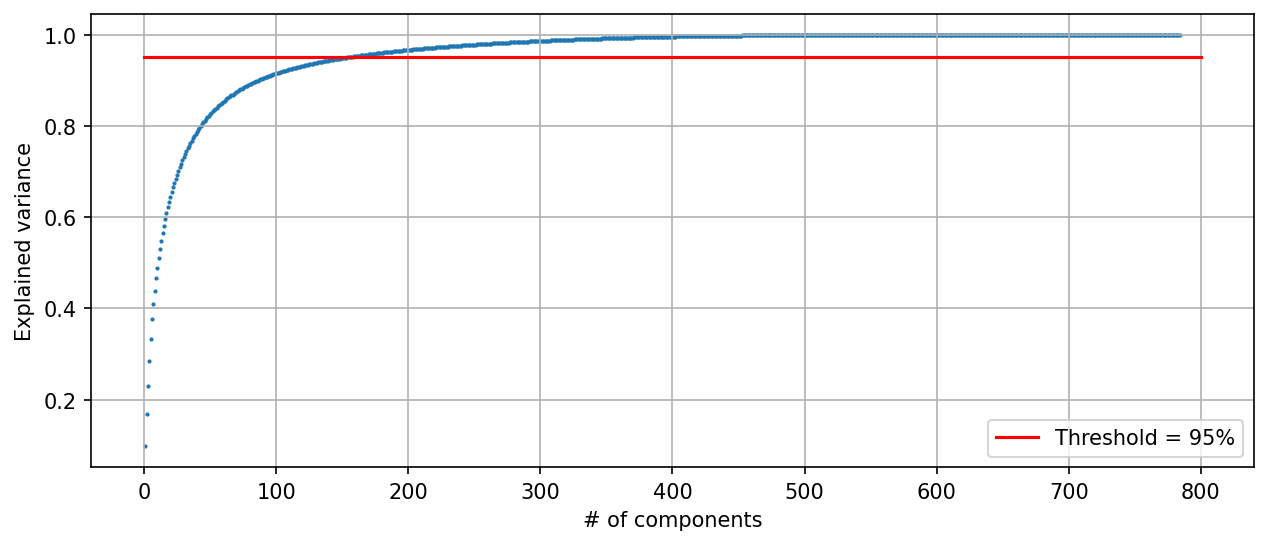

In [81]:
plt.figure(dpi=150, figsize=(10, 4))
plt.scatter(range(1, 785), np.cumsum(pca.explained_variance_ratio_), s=1)
plt.xlabel('# of components')
plt.ylabel('Explained variance')
plt.plot(np.linspace(0, 800, 100), [0.95]*100, 'r', label='Threshold = 95%')
plt.grid(); plt.legend()

In [68]:
cum_variance = np.cumsum(pca.explained_variance_ratio_)
print('Эффективная размерность данных равна', np.where(cum_variance >= 0.95)[0][0] + 1)

Эффективная размерность данных равна 154


In [82]:
cum_variance[154]

0.9507971426974619

In [83]:
# https://machinelearningmastery.com/principal-components-analysis-for-dimensionality-reduction-in-python/
from sklearn.pipeline import Pipeline


def get_models(n_dim):
    models = dict()
    for i in range(1, n_dim+1):
        steps = [('pca', PCA(n_components=i)), ('m', RidgeClassifier())]
        models[str(i)] = Pipeline(steps=steps)
    return models


def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [84]:
from tqdm import tqdm

In [85]:
models = get_models(150)  # построим только до размерности 150, т.к. для большей будут те же результаты
results, names = list(), list()
for name, model in tqdm(models.items()):
    score = evaluate_model(model, X_train, y_train, X_test, y_test)
    results.append(score)
    names.append(name)
    print(name, score)

  1%|▌                                                                                 | 1/150 [00:03<08:00,  3.23s/it]

1 0.21542857142857144


  1%|█                                                                                 | 2/150 [00:06<07:46,  3.15s/it]

2 0.33414285714285713


  2%|█▋                                                                                | 3/150 [00:09<07:28,  3.05s/it]

3 0.3802857142857143


  3%|██▏                                                                               | 4/150 [00:12<07:18,  3.00s/it]

4 0.48814285714285716


  3%|██▋                                                                               | 5/150 [00:14<06:59,  2.89s/it]

5 0.56


  4%|███▎                                                                              | 6/150 [00:18<07:29,  3.12s/it]

6 0.6107142857142858


  5%|███▊                                                                              | 7/150 [00:21<07:40,  3.22s/it]

7 0.6477142857142857


  5%|████▎                                                                             | 8/150 [00:26<08:35,  3.63s/it]

8 0.6881428571428572


  6%|████▉                                                                             | 9/150 [00:31<09:28,  4.03s/it]

9 0.69


  7%|█████▍                                                                           | 10/150 [00:34<08:55,  3.83s/it]

10 0.6952857142857143


  7%|█████▉                                                                           | 11/150 [00:38<08:48,  3.80s/it]

11 0.6948571428571428


  8%|██████▍                                                                          | 12/150 [00:42<08:59,  3.91s/it]

12 0.7038571428571428


  9%|███████                                                                          | 13/150 [00:46<08:50,  3.87s/it]

13 0.7244285714285714


  9%|███████▌                                                                         | 14/150 [00:50<08:49,  3.89s/it]

14 0.7325714285714285


 10%|████████                                                                         | 15/150 [00:54<08:44,  3.88s/it]

15 0.7381428571428571


 11%|████████▋                                                                        | 16/150 [00:57<08:34,  3.84s/it]

16 0.7637142857142857


 11%|█████████▏                                                                       | 17/150 [01:01<08:28,  3.82s/it]

17 0.7752857142857142


 12%|█████████▋                                                                       | 18/150 [01:05<08:28,  3.85s/it]

18 0.7761428571428571


 13%|██████████▎                                                                      | 19/150 [01:09<08:34,  3.93s/it]

19 0.785


 13%|██████████▊                                                                      | 20/150 [01:13<08:29,  3.92s/it]

20 0.7947142857142857


 14%|███████████▎                                                                     | 21/150 [01:17<08:32,  3.98s/it]

21 0.7938571428571428


 15%|███████████▉                                                                     | 22/150 [01:21<08:36,  4.04s/it]

22 0.7977142857142857


 15%|████████████▍                                                                    | 23/150 [01:26<08:40,  4.10s/it]

23 0.806


 16%|████████████▉                                                                    | 24/150 [01:30<08:37,  4.11s/it]

24 0.8058571428571428


 17%|█████████████▌                                                                   | 25/150 [01:34<08:34,  4.11s/it]

25 0.8118571428571428


 17%|██████████████                                                                   | 26/150 [01:38<08:29,  4.11s/it]

26 0.8128571428571428


 18%|██████████████▌                                                                  | 27/150 [01:42<08:30,  4.15s/it]

27 0.8134285714285714


 19%|███████████████                                                                  | 28/150 [01:47<08:34,  4.22s/it]

28 0.8104285714285714


 19%|███████████████▋                                                                 | 29/150 [01:51<08:37,  4.28s/it]

29 0.8095714285714286


 20%|████████████████▏                                                                | 30/150 [01:56<08:45,  4.38s/it]

30 0.8114285714285714


 21%|████████████████▋                                                                | 31/150 [02:00<08:47,  4.44s/it]

31 0.8114285714285714


 21%|█████████████████▎                                                               | 32/150 [02:05<08:51,  4.51s/it]

32 0.816


 22%|█████████████████▊                                                               | 33/150 [02:09<08:48,  4.52s/it]

33 0.8165714285714286


 23%|██████████████████▎                                                              | 34/150 [02:14<08:52,  4.59s/it]

34 0.82


 23%|██████████████████▉                                                              | 35/150 [02:19<08:57,  4.67s/it]

35 0.8225714285714286


 24%|███████████████████▍                                                             | 36/150 [02:24<08:55,  4.70s/it]

36 0.824


 25%|███████████████████▉                                                             | 37/150 [02:29<08:56,  4.75s/it]

37 0.8237142857142857


 25%|████████████████████▌                                                            | 38/150 [02:34<08:55,  4.78s/it]

38 0.823


 26%|█████████████████████                                                            | 39/150 [02:38<08:51,  4.78s/it]

39 0.8247142857142857


 27%|█████████████████████▌                                                           | 40/150 [02:43<08:48,  4.80s/it]

40 0.8234285714285714


 27%|██████████████████████▏                                                          | 41/150 [02:48<08:48,  4.85s/it]

41 0.8284285714285714


 28%|██████████████████████▋                                                          | 42/150 [02:53<08:49,  4.90s/it]

42 0.831


 29%|███████████████████████▏                                                         | 43/150 [02:58<08:49,  4.95s/it]

43 0.8301428571428572


 29%|███████████████████████▊                                                         | 44/150 [03:03<08:53,  5.03s/it]

44 0.8304285714285714


 30%|████████████████████████▎                                                        | 45/150 [03:09<08:58,  5.13s/it]

45 0.8298571428571428


 31%|████████████████████████▊                                                        | 46/150 [03:14<09:01,  5.21s/it]

46 0.8297142857142857


 31%|█████████████████████████▍                                                       | 47/150 [03:20<09:06,  5.31s/it]

47 0.8331428571428572


 32%|█████████████████████████▉                                                       | 48/150 [03:25<09:05,  5.35s/it]

48 0.8331428571428572


 33%|██████████████████████████▍                                                      | 49/150 [03:31<09:03,  5.38s/it]

49 0.8325714285714285


 33%|███████████████████████████                                                      | 50/150 [03:36<08:51,  5.32s/it]

50 0.8334285714285714


 34%|███████████████████████████▌                                                     | 51/150 [03:41<08:50,  5.36s/it]

51 0.834


 35%|████████████████████████████                                                     | 52/150 [03:46<08:41,  5.32s/it]

52 0.8358571428571429


 35%|████████████████████████████▌                                                    | 53/150 [03:52<08:40,  5.36s/it]

53 0.834


 36%|█████████████████████████████▏                                                   | 54/150 [03:58<08:41,  5.43s/it]

54 0.8345714285714285


 37%|█████████████████████████████▋                                                   | 55/150 [04:03<08:41,  5.49s/it]

55 0.8355714285714285


 37%|██████████████████████████████▏                                                  | 56/150 [04:09<08:40,  5.54s/it]

56 0.8364285714285714


 38%|██████████████████████████████▊                                                  | 57/150 [04:14<08:36,  5.56s/it]

57 0.8372857142857143


 39%|███████████████████████████████▎                                                 | 58/150 [04:21<08:51,  5.78s/it]

58 0.8368571428571429


 39%|███████████████████████████████▊                                                 | 59/150 [04:27<09:05,  6.00s/it]

59 0.8365714285714285


 40%|████████████████████████████████▍                                                | 60/150 [04:34<09:19,  6.21s/it]

60 0.8351428571428572


 41%|████████████████████████████████▉                                                | 61/150 [04:40<09:15,  6.24s/it]

61 0.8364285714285714


 41%|█████████████████████████████████▍                                               | 62/150 [04:48<09:43,  6.63s/it]

62 0.8374285714285714


 42%|██████████████████████████████████                                               | 63/150 [04:54<09:29,  6.54s/it]

63 0.8385714285714285


 43%|██████████████████████████████████▌                                              | 64/150 [05:00<09:10,  6.41s/it]

64 0.8395714285714285


 43%|███████████████████████████████████                                              | 65/150 [05:06<09:00,  6.36s/it]

65 0.8385714285714285


 44%|███████████████████████████████████▋                                             | 66/150 [05:13<08:52,  6.34s/it]

66 0.8387142857142857


 45%|████████████████████████████████████▏                                            | 67/150 [05:19<08:48,  6.36s/it]

67 0.8401428571428572


 45%|████████████████████████████████████▋                                            | 68/150 [05:25<08:40,  6.35s/it]

68 0.8401428571428572


 46%|█████████████████████████████████████▎                                           | 69/150 [05:32<08:33,  6.34s/it]

69 0.8401428571428572


 47%|█████████████████████████████████████▊                                           | 70/150 [05:38<08:31,  6.39s/it]

70 0.8418571428571429


 47%|██████████████████████████████████████▎                                          | 71/150 [05:45<08:28,  6.43s/it]

71 0.8422857142857143


 48%|██████████████████████████████████████▉                                          | 72/150 [05:51<08:25,  6.49s/it]

72 0.841


 49%|███████████████████████████████████████▍                                         | 73/150 [05:58<08:22,  6.53s/it]

73 0.8407142857142857


 49%|███████████████████████████████████████▉                                         | 74/150 [06:05<08:18,  6.56s/it]

74 0.8412857142857143


 50%|████████████████████████████████████████▌                                        | 75/150 [06:11<08:17,  6.63s/it]

75 0.8424285714285714


 51%|█████████████████████████████████████████                                        | 76/150 [06:18<08:16,  6.71s/it]

76 0.8442857142857143


 51%|█████████████████████████████████████████▌                                       | 77/150 [06:25<08:15,  6.78s/it]

77 0.8437142857142857


 52%|██████████████████████████████████████████                                       | 78/150 [06:32<08:13,  6.86s/it]

78 0.8441428571428572


 53%|██████████████████████████████████████████▋                                      | 79/150 [06:37<07:28,  6.32s/it]

79 0.8425714285714285


 53%|███████████████████████████████████████████▏                                     | 80/150 [06:42<06:55,  5.94s/it]

80 0.8447142857142858


 54%|███████████████████████████████████████████▋                                     | 81/150 [06:48<06:31,  5.67s/it]

81 0.8437142857142857


 55%|████████████████████████████████████████████▎                                    | 82/150 [06:52<06:10,  5.45s/it]

82 0.845


 55%|████████████████████████████████████████████▊                                    | 83/150 [06:57<05:55,  5.30s/it]

83 0.8442857142857143


 56%|█████████████████████████████████████████████▎                                   | 84/150 [07:02<05:44,  5.22s/it]

84 0.8467142857142858


 57%|█████████████████████████████████████████████▉                                   | 85/150 [07:08<05:39,  5.22s/it]

85 0.845


 57%|██████████████████████████████████████████████▍                                  | 86/150 [07:13<05:37,  5.27s/it]

86 0.8467142857142858


 58%|██████████████████████████████████████████████▉                                  | 87/150 [07:18<05:32,  5.28s/it]

87 0.8471428571428572


 59%|███████████████████████████████████████████████▌                                 | 88/150 [07:24<05:27,  5.27s/it]

88 0.8478571428571429


 59%|████████████████████████████████████████████████                                 | 89/150 [07:29<05:19,  5.24s/it]

89 0.8448571428571429


 60%|████████████████████████████████████████████████▌                                | 90/150 [07:34<05:14,  5.24s/it]

90 0.8442857142857143


 61%|█████████████████████████████████████████████████▏                               | 91/150 [07:39<05:09,  5.24s/it]

91 0.8457142857142858


 61%|█████████████████████████████████████████████████▋                               | 92/150 [07:45<05:08,  5.32s/it]

92 0.8478571428571429


 62%|██████████████████████████████████████████████████▏                              | 93/150 [07:50<05:06,  5.38s/it]

93 0.8482857142857143


 63%|██████████████████████████████████████████████████▊                              | 94/150 [07:56<05:05,  5.45s/it]

94 0.8464285714285714


 63%|███████████████████████████████████████████████████▎                             | 95/150 [08:02<05:02,  5.50s/it]

95 0.8468571428571429


 64%|███████████████████████████████████████████████████▊                             | 96/150 [08:07<05:00,  5.57s/it]

96 0.8461428571428572


 65%|████████████████████████████████████████████████████▍                            | 97/150 [08:13<04:57,  5.62s/it]

97 0.8442857142857143


 65%|████████████████████████████████████████████████████▉                            | 98/150 [08:19<04:54,  5.67s/it]

98 0.8468571428571429


 66%|█████████████████████████████████████████████████████▍                           | 99/150 [08:25<04:51,  5.72s/it]

99 0.8464285714285714


 67%|█████████████████████████████████████████████████████▎                          | 100/150 [08:30<04:47,  5.76s/it]

100 0.8448571428571429


 67%|█████████████████████████████████████████████████████▊                          | 101/150 [08:36<04:43,  5.78s/it]

101 0.8472857142857143


 68%|██████████████████████████████████████████████████████▍                         | 102/150 [08:42<04:40,  5.84s/it]

102 0.847


 69%|██████████████████████████████████████████████████████▉                         | 103/150 [08:48<04:34,  5.83s/it]

103 0.8451428571428572


 69%|███████████████████████████████████████████████████████▍                        | 104/150 [08:54<04:33,  5.95s/it]

104 0.8465714285714285


 70%|████████████████████████████████████████████████████████                        | 105/150 [09:00<04:30,  6.01s/it]

105 0.8464285714285714


 71%|████████████████████████████████████████████████████████▌                       | 106/150 [09:07<04:26,  6.05s/it]

106 0.8461428571428572


 71%|█████████████████████████████████████████████████████████                       | 107/150 [09:13<04:21,  6.08s/it]

107 0.8452857142857143


 72%|█████████████████████████████████████████████████████████▌                      | 108/150 [09:19<04:18,  6.16s/it]

108 0.8467142857142858


 73%|██████████████████████████████████████████████████████████▏                     | 109/150 [09:26<04:17,  6.28s/it]

109 0.8452857142857143


 73%|██████████████████████████████████████████████████████████▋                     | 110/150 [09:32<04:12,  6.32s/it]

110 0.8458571428571429


 74%|███████████████████████████████████████████████████████████▏                    | 111/150 [09:38<04:06,  6.33s/it]

111 0.8464285714285714


 75%|███████████████████████████████████████████████████████████▋                    | 112/150 [09:46<04:17,  6.77s/it]

112 0.848


 75%|████████████████████████████████████████████████████████████▎                   | 113/150 [09:53<04:15,  6.90s/it]

113 0.8477142857142858


 76%|████████████████████████████████████████████████████████████▊                   | 114/150 [10:00<04:02,  6.72s/it]

114 0.8471428571428572


 77%|█████████████████████████████████████████████████████████████▎                  | 115/150 [10:06<03:51,  6.61s/it]

115 0.8467142857142858


 77%|█████████████████████████████████████████████████████████████▊                  | 116/150 [10:12<03:42,  6.54s/it]

116 0.8462857142857143


 78%|██████████████████████████████████████████████████████████████▍                 | 117/150 [10:19<03:36,  6.55s/it]

117 0.8444285714285714


 79%|██████████████████████████████████████████████████████████████▉                 | 118/150 [10:26<03:31,  6.62s/it]

118 0.8451428571428572


 79%|███████████████████████████████████████████████████████████████▍                | 119/150 [10:32<03:19,  6.44s/it]

119 0.8458571428571429


 80%|████████████████████████████████████████████████████████████████                | 120/150 [10:38<03:09,  6.30s/it]

120 0.8465714285714285


 81%|████████████████████████████████████████████████████████████████▌               | 121/150 [10:44<03:01,  6.25s/it]

121 0.8457142857142858


 81%|█████████████████████████████████████████████████████████████████               | 122/150 [10:50<02:53,  6.19s/it]

122 0.8461428571428572


 82%|█████████████████████████████████████████████████████████████████▌              | 123/150 [10:56<02:46,  6.18s/it]

123 0.8454285714285714


 83%|██████████████████████████████████████████████████████████████████▏             | 124/150 [11:02<02:40,  6.18s/it]

124 0.8462857142857143


 83%|██████████████████████████████████████████████████████████████████▋             | 125/150 [11:09<02:35,  6.21s/it]

125 0.8474285714285714


 84%|███████████████████████████████████████████████████████████████████▏            | 126/150 [11:15<02:31,  6.32s/it]

126 0.8462857142857143


 85%|███████████████████████████████████████████████████████████████████▋            | 127/150 [11:22<02:27,  6.41s/it]

127 0.8454285714285714


 85%|████████████████████████████████████████████████████████████████████▎           | 128/150 [11:28<02:21,  6.44s/it]

128 0.847


 86%|████████████████████████████████████████████████████████████████████▊           | 129/150 [11:35<02:15,  6.45s/it]

129 0.8462857142857143


 87%|█████████████████████████████████████████████████████████████████████▎          | 130/150 [11:41<02:09,  6.48s/it]

130 0.8447142857142858


 87%|█████████████████████████████████████████████████████████████████████▊          | 131/150 [11:48<02:03,  6.51s/it]

131 0.8461428571428572


 88%|██████████████████████████████████████████████████████████████████████▍         | 132/150 [11:55<01:59,  6.62s/it]

132 0.8451428571428572


 89%|██████████████████████████████████████████████████████████████████████▉         | 133/150 [12:01<01:52,  6.64s/it]

133 0.8468571428571429


 89%|███████████████████████████████████████████████████████████████████████▍        | 134/150 [12:08<01:47,  6.72s/it]

134 0.8448571428571429


 90%|████████████████████████████████████████████████████████████████████████        | 135/150 [12:15<01:41,  6.75s/it]

135 0.847


 91%|████████████████████████████████████████████████████████████████████████▌       | 136/150 [12:22<01:35,  6.80s/it]

136 0.8464285714285714


 91%|█████████████████████████████████████████████████████████████████████████       | 137/150 [12:29<01:28,  6.83s/it]

137 0.8472857142857143


 92%|█████████████████████████████████████████████████████████████████████████▌      | 138/150 [12:36<01:22,  6.85s/it]

138 0.847


 93%|██████████████████████████████████████████████████████████████████████████▏     | 139/150 [12:43<01:15,  6.88s/it]

139 0.845


 93%|██████████████████████████████████████████████████████████████████████████▋     | 140/150 [12:50<01:09,  6.92s/it]

140 0.8467142857142858


 94%|███████████████████████████████████████████████████████████████████████████▏    | 141/150 [12:57<01:03,  7.02s/it]

141 0.8465714285714285


 95%|███████████████████████████████████████████████████████████████████████████▋    | 142/150 [13:04<00:56,  7.11s/it]

142 0.846


 95%|████████████████████████████████████████████████████████████████████████████▎   | 143/150 [13:12<00:50,  7.15s/it]

143 0.8461428571428572


 96%|████████████████████████████████████████████████████████████████████████████▊   | 144/150 [13:19<00:43,  7.18s/it]

144 0.8481428571428572


 97%|█████████████████████████████████████████████████████████████████████████████▎  | 145/150 [13:26<00:36,  7.20s/it]

145 0.8441428571428572


 97%|█████████████████████████████████████████████████████████████████████████████▊  | 146/150 [13:33<00:28,  7.23s/it]

146 0.8451428571428572


 98%|██████████████████████████████████████████████████████████████████████████████▍ | 147/150 [13:41<00:21,  7.24s/it]

147 0.8467142857142858


 99%|██████████████████████████████████████████████████████████████████████████████▉ | 148/150 [13:48<00:14,  7.26s/it]

148 0.8462857142857143


 99%|███████████████████████████████████████████████████████████████████████████████▍| 149/150 [13:56<00:07,  7.36s/it]

149 0.8438571428571429


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [14:04<00:00,  5.63s/it]

150 0.846


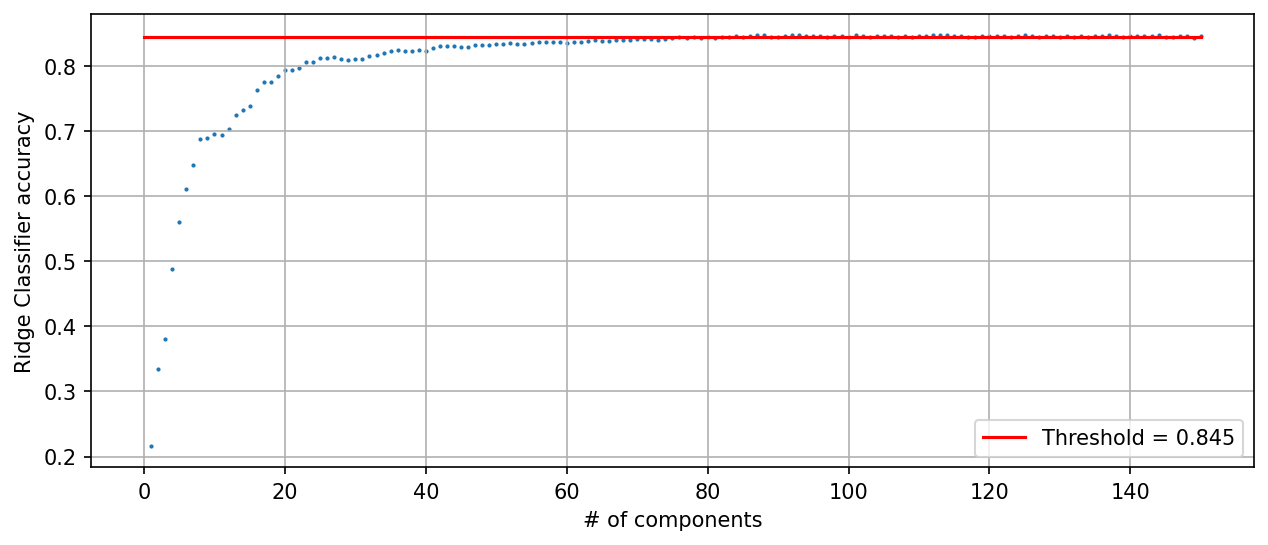

In [89]:
plt.figure(dpi=150, figsize=(10, 4))
plt.scatter(range(1, len(results)+1), np.array(results), s=1)
plt.xlabel('# of components')
plt.ylabel('Ridge Classifier accuracy')
plt.plot(np.linspace(0, 150, 100), [0.845]*100, 'r', label='Threshold = 0.845')
plt.grid(); plt.legend()

In [87]:
print('Эффективная размерность данных равна', np.where(np.array(results) >= 0.845)[0][0])

Эффективная размерность данных равна 81


**Зависимость тоже монотонная, как и в случае с сохраненной дисперсией. Ее насыщение наступает при меньшей размерности данных, что может быть связано с пределом точности для самого алгоритма.**

# Строим модели на данных меньшей размерности
Понизьте размерность данных до эффективной размерности (помните, что это не то значение, на котором происходит резкий спуск, а следующее)

In [33]:
real_pca = PCA(0.95)
data_lowdim = real_pca.fit_transform(mnist.data)
X_train_lowdim, X_test_lowdim = real_pca.transform(X_train), real_pca.transform(X_test)

**Пункт 6.1 (0.9 баллов)** Постройте линейные модели, kNN классификатор, случайный лес, а также бустинг над деревьями. Подберите оптимальные гиперпараметры для каждой модели. Сравните качества с достигнутыми качествами до понижения размерности. Сделайте выводы.

In [31]:
train_linear_models(X_train_lowdim, y_train, X_test_lowdim, y_test)

c:\users\volko\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Classification Learning time = 10.387466430664062 seconds
Logistic Classification Accuracy = 0.9142857142857143

Ridge Classification Learning time = 0.34293460845947266 seconds
Ridge Classification Accuracy = 0.8462857142857143

Lasso Classification Learning time = 0.32697153091430664 seconds
Lasso Classification Accuracy = 0.5839863477727181



kNN
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters are {'weights': 'distance', 'n_neighbors': 30, 'leaf_size': 25}
kNN_lowdim Classifier Accuracy = 0.9624285714285714

RandomForest
Fitting 3 folds for each of 9 candidates, totalling 27 fits


c:\users\volko\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Best parameters are {'n_estimators': 300, 'max_depth': 13}
RandomForest_lowdim Classifier Accuracy = 0.9361428571428572



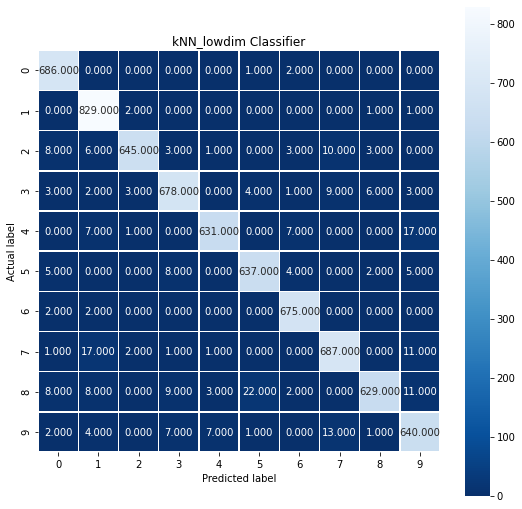

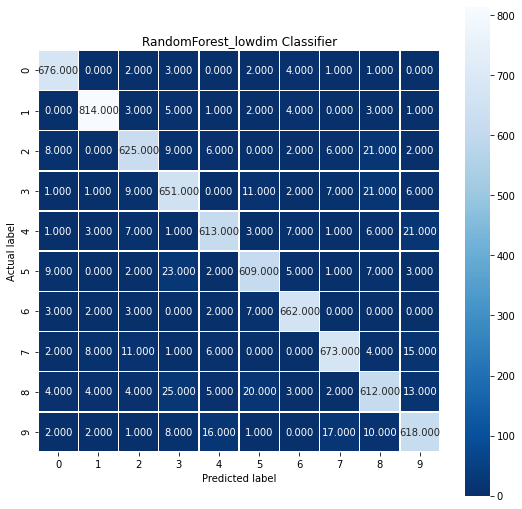

In [42]:
for (classifier, name), params in zip(
        [
            (KNeighborsClassifier, 'kNN_lowdim'), 
            (RandomForestClassifier, 'RandomForest_lowdim'), 
#             (GradientBoostingClassifier, 'BoostedTrees')
        ],
        [
            {  # kNN
                'n_neighbors': range(30, 51, 10), 
                'weights': ['distance'],
                'leaf_size': range(10, 31, 5)
            },
            {  # RandomForest
                'n_estimators': range(100, 301, 100), 
                'max_depth': range(3, 16, 5)
            },
#             {  # BoostedTrees
#                 'n_estimators': range(100, 301, 100), 
#                 'max_depth': range(3, 16, 5)  # бустинг из sklearn учится нереально долго,
#             }  # поэтому параметры нормально подобрать просто невозможно, I give up
        ]
    ):
    print(name.split('_')[0])
    best_classifiers[name] = choose_classifier_params(classifier, params, X_train_lowdim, y_train, X_test_lowdim, y_test)

In [34]:
start = time()
Boosted_Trees = XGBClassifier(objective='multi:softprob', n_jobs=2)
best_classifiers['BoostedTrees_lowdim'] = Boosted_Trees.fit(
    X_train_lowdim, y_train, 
    eval_set=[(X_test_lowdim, y_test)],
    eval_metric='merror',
    verbose=True,
    early_stopping_rounds=True
)
print(f'XGBoostClassifier_lowdim learning time = {time() - start} seconds')

c:\users\volko\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-merror:0.18800
[1]	validation_0-merror:0.15443
[2]	validation_0-merror:0.13871
[3]	validation_0-merror:0.13129
[4]	validation_0-merror:0.12371
[5]	validation_0-merror:0.11743
[6]	validation_0-merror:0.11000
[7]	validation_0-merror:0.10457
[8]	validation_0-merror:0.10214
[9]	validation_0-merror:0.09743
[10]	validation_0-merror:0.09429
[11]	validation_0-merror:0.09157
[12]	validation_0-merror:0.08857
[13]	validation_0-merror:0.08657
[14]	validation_0-merror:0.08343
[15]	validation_0-merror:0.08200
[16]	validation_0-merror:0.07914
[17]	validation_0-merror:0.07671
[18]	validation_0-merror:0.07343
[19]	validation_0-merror:0.07200
[20]	validation_0-merror:0.07057
[21]	validation_0-merror:0.06886
[22]	validation_0-merror:0.06686
[23]	validation_0-merror:0.06400
[24]	validation_0-merror:0.06286
[25]	validation_0-merror:0.06257
[26]	validation_0-merror:0.06143
[27]	validation_0-merror:0.06000
[28]	validation_0-merror:0.05886
[29]	validation_0-merror:0.05743
[30]	validation_0-me

NameError: name 'accuracy_score' is not defined

BoostedTrees_lowdim Classifier Accuracy = 0.9425714285714286



Text(0.5, 1.0, 'BoostedTrees_lowdim Classifier')

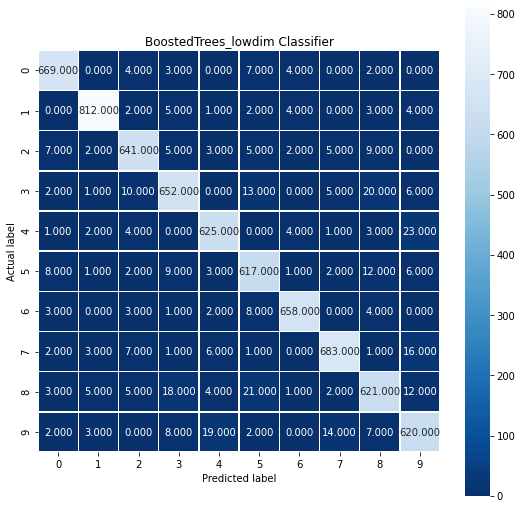

In [37]:
print(f'''BoostedTrees_lowdim Classifier Accuracy = {
accuracy_score(best_classifiers['BoostedTrees_lowdim'].predict(X_test_lowdim), y_test)}''', end='\n\n')

conf_matrix = confusion_matrix(y_test, best_classifiers['BoostedTrees_lowdim'].predict(X_test_lowdim))

plt.figure(figsize=(9,9))
sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label'); plt.xlabel('Predicted label'); plt.title('BoostedTrees_lowdim Classifier')

**Качество несильно изменилось относительно пункта 1.2, но обучение прошло быстрее. Значит, выбранная размерность действительно хорошо выделяет информацию из данных, но не лучшим образом (хотя может параметры алгоритмов не лучшим образом подобрано, но я устал...).**

**Пункт 6.2 (0.9 баллов)** Отнормируйте признаки используя StandardScaler. Постройте те же типы моделей, что и в предыдущем пункте, подберите оптимальные гиперпараметры. Сравните метрики качества, сделайте выводы

In [38]:
#ваш код здесь
from sklearn.preprocessing import StandardScaler

In [51]:
scaler = StandardScaler()

data_scaled = scaler.fit_transform(mnist.data)
X_train_scaled, X_test_scaled = scaler.transform(X_train), scaler.transform(X_test)

real_pca.fit(data_scaled)
X_train_scaled_lowdim, X_test_scaled_lowdim = real_pca.transform(X_train_scaled), real_pca.transform(X_test_scaled)

In [52]:
train_linear_models(X_train_scaled_lowdim, y_train, X_test_scaled_lowdim, y_test)

c:\users\volko\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Classification Learning time = 15.176743745803833 seconds
Logistic Classification Accuracy = 0.9181428571428571

Ridge Classification Learning time = 0.4900846481323242 seconds
Ridge Classification Accuracy = 0.8478571428571429

Lasso Classification Learning time = 0.7145564556121826 seconds
Lasso Classification Accuracy = 0.36955628742055435



kNN
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters are {'weights': 'distance', 'n_neighbors': 30, 'leaf_size': 20}
kNN_lowdim_scaled Classifier Accuracy = 0.9347142857142857



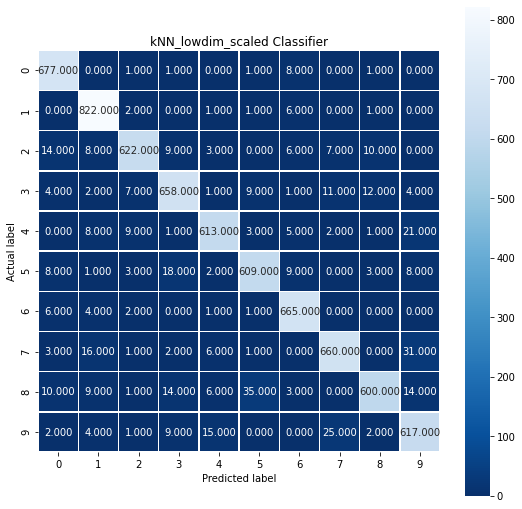

In [58]:
for (classifier, name), params in zip(
        [
            (KNeighborsClassifier, 'kNN_lowdim_scaled'), 
#             (RandomForestClassifier, 'RandomForest_lowdim_scaled'), 
#             (GradientBoostingClassifier, 'BoostedTrees')
        ],
        [
            {  # kNN
                'n_neighbors': range(30, 51, 10), 
                'weights': ['distance'],
                'leaf_size': range(10, 31, 5)
            },
#             {  # RandomForest
#                 'n_estimators': range(100, 301, 100), 
#                 'max_depth': range(10, 51, 10)
#             },
#             {  # BoostedTrees
#                 'n_estimators': range(100, 301, 100), 
#                 'max_depth': range(3, 16, 5)  # бустинг из sklearn учится нереально долго,
#             }  # поэтому параметры нормально подобрать просто невозможно, I give up
        ]
    ):
    print(name.split('_')[0])
    best_classifiers[name] = choose_classifier_params(classifier, params, X_train_scaled_lowdim, y_train, X_test_scaled_lowdim, y_test)

In [61]:
# короче я и тут устал учить с sklearn и перешел на темную сторону
# и опять не подобрал параметры...
from xgboost import XGBRFClassifier

In [63]:
start = time()
Random_Forest = XGBRFClassifier(objective='multi:softprob', n_jobs=2)
best_classifiers['RandomForest_scaled_lowdim'] = Boosted_Trees.fit(
    X_train_scaled_lowdim, y_train, 
    eval_set=[(X_test_scaled_lowdim, y_test)],
    eval_metric='merror',
    verbose=True,
    early_stopping_rounds=True
)
print(f'XGBoostRFClassifier_scaled_lowdim learning time = {time() - start} seconds')

[0]	validation_0-merror:0.18471
[1]	validation_0-merror:0.15243
[2]	validation_0-merror:0.13800
[3]	validation_0-merror:0.12557
[4]	validation_0-merror:0.11971
[5]	validation_0-merror:0.11300
[6]	validation_0-merror:0.11000
[7]	validation_0-merror:0.10586
[8]	validation_0-merror:0.10171
[9]	validation_0-merror:0.09786
[10]	validation_0-merror:0.09371
[11]	validation_0-merror:0.09086
[12]	validation_0-merror:0.08714
[13]	validation_0-merror:0.08414
[14]	validation_0-merror:0.08300
[15]	validation_0-merror:0.07943
[16]	validation_0-merror:0.07786
[17]	validation_0-merror:0.07586
[18]	validation_0-merror:0.07414
[19]	validation_0-merror:0.07200
[20]	validation_0-merror:0.07000
[21]	validation_0-merror:0.06714
[22]	validation_0-merror:0.06629
[23]	validation_0-merror:0.06571
[24]	validation_0-merror:0.06486
[25]	validation_0-merror:0.06314
[26]	validation_0-merror:0.06286
[27]	validation_0-merror:0.06171
[28]	validation_0-merror:0.06086
[29]	validation_0-merror:0.06029
[30]	validation_0-me

RandomForest_scaled_lowdim Classifier Accuracy = 0.9407142857142857



Text(0.5, 1.0, 'RandomForest_scaled_lowdim Classifier')

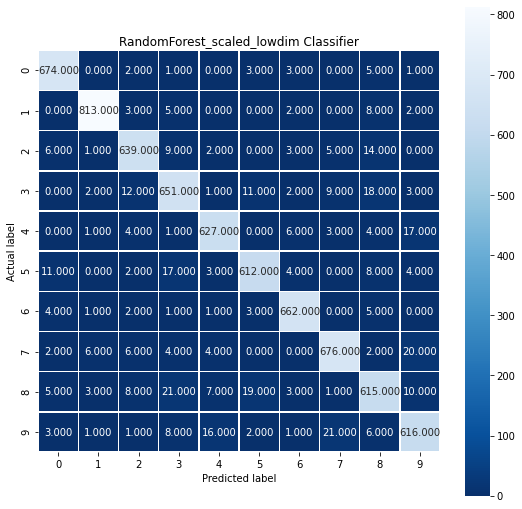

In [64]:
print(f'''RandomForest_scaled_lowdim Classifier Accuracy = {
accuracy_score(best_classifiers['RandomForest_scaled_lowdim'].predict(X_test_scaled_lowdim), y_test)}''', end='\n\n')

conf_matrix = confusion_matrix(y_test, best_classifiers['RandomForest_scaled_lowdim'].predict(X_test_scaled_lowdim))

plt.figure(figsize=(9,9))
sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label'); plt.xlabel('Predicted label'); plt.title('RandomForest_scaled_lowdim Classifier')

In [65]:
start = time()
Boosted_Trees = XGBClassifier(objective='multi:softprob', n_jobs=2)
best_classifiers['BoostedTrees_scaled_lowdim'] = Boosted_Trees.fit(
    X_train_scaled_lowdim, y_train, 
    eval_set=[(X_test_scaled_lowdim, y_test)],
    eval_metric='merror',
    verbose=True,
    early_stopping_rounds=True
)
print(f'XGBoostClassifier_scaled_lowdim learning time = {time() - start} seconds')

c:\users\volko\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-merror:0.18471
[1]	validation_0-merror:0.15243
[2]	validation_0-merror:0.13800
[3]	validation_0-merror:0.12557
[4]	validation_0-merror:0.11971
[5]	validation_0-merror:0.11300
[6]	validation_0-merror:0.11000
[7]	validation_0-merror:0.10586
[8]	validation_0-merror:0.10171
[9]	validation_0-merror:0.09786
[10]	validation_0-merror:0.09371
[11]	validation_0-merror:0.09086
[12]	validation_0-merror:0.08714
[13]	validation_0-merror:0.08414
[14]	validation_0-merror:0.08300
[15]	validation_0-merror:0.07943
[16]	validation_0-merror:0.07786
[17]	validation_0-merror:0.07586
[18]	validation_0-merror:0.07414
[19]	validation_0-merror:0.07200
[20]	validation_0-merror:0.07000
[21]	validation_0-merror:0.06714
[22]	validation_0-merror:0.06629
[23]	validation_0-merror:0.06571
[24]	validation_0-merror:0.06486
[25]	validation_0-merror:0.06314
[26]	validation_0-merror:0.06286
[27]	validation_0-merror:0.06171
[28]	validation_0-merror:0.06086
[29]	validation_0-merror:0.06029
[30]	validation_0-me

BoostedTrees_scaled_lowdim Classifier Accuracy = 0.9407142857142857



Text(0.5, 1.0, 'BoostedTrees_scaled_lowdim Classifier')

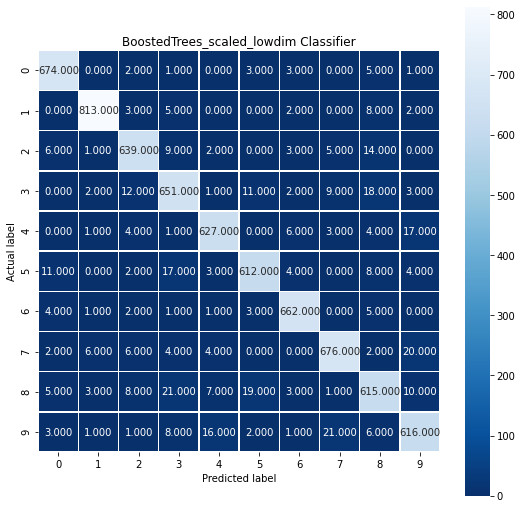

In [66]:
print(f'''BoostedTrees_scaled_lowdim Classifier Accuracy = {
accuracy_score(best_classifiers['BoostedTrees_scaled_lowdim'].predict(X_test_scaled_lowdim), y_test)}''', end='\n\n')

conf_matrix = confusion_matrix(y_test, best_classifiers['BoostedTrees_scaled_lowdim'].predict(X_test_scaled_lowdim))

plt.figure(figsize=(9,9))
sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label'); plt.xlabel('Predicted label'); plt.title('BoostedTrees_scaled_lowdim Classifier')

**Получились результаты с немного меньшим Accuracy, скорее всего потому, что параметры не были подобраны неоптимальными. Хотя для RandomForest все хорошо, после шкалирования данных Accuracy вырос, как и должно быть (веса учаться примерно одного порядка, нет слишком больших или слишком маленьких).**

# Summary
Получилось все, что не относится к подбору параметров, а с неполучившимся у меня времени бороться нет(((